#`This notebook is an Illustration to implement Linear Discriminant Algorithm and Quadratic Discriminant Algorithm with Sklearn using Python 🐍`

For more information, check out the [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis) & [QDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis)

## **Setup**
Let's setup the imports:   

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style() 
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# custom color map
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])

Let's load the Iris dataset which is in-build in Seaborn and do some preprocessing:

In [2]:
df = sns.load_dataset('iris')
df = df[df['species'] != 'setosa']
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'versicolor': 0, 'virginica': 1}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp'] 
X.head() 

,petal_length,petal_width
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5


## LINEAR DISCRIMINANT ALGORITHM

In [4]:
clf = LinearDiscriminantAnalysis(shrinkage=0.2, solver='eigen')
clf.fit(X, y) 

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.2,
                           solver='eigen', store_covariance=False, tol=0.0001)

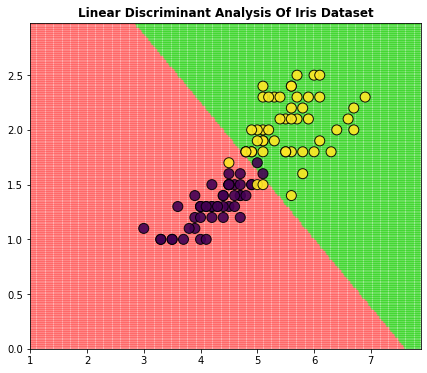

In [5]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)
fig = plt.figure(figsize=(7,6))
ax = plt.pcolormesh(xx, yy, z, cmap = cm_dark, alpha=0.5);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=100, 
            alpha=0.9, edgecolors='k');       
plt.title("Linear Discriminant Analysis Of Iris Dataset", fontweight='bold');                 

## QUADRATIC DISCRIMINANT ALGORITHM

In [7]:
clf1 = QuadraticDiscriminantAnalysis(store_covariance=False)
clf1.fit(X, y) 

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

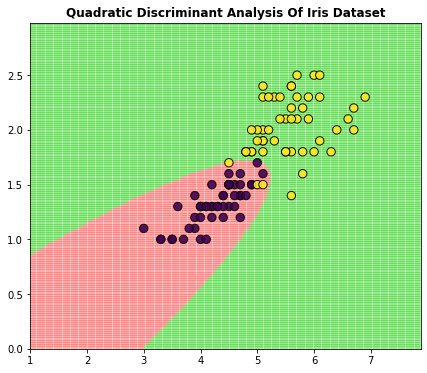

In [8]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)
fig = plt.figure(figsize=(7,6))
ax = plt.pcolormesh(xx, yy, z, cmap = cm_dark, alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=70, 
            alpha=0.9, edgecolors='k');       
plt.title("Quadratic Discriminant Analysis Of Iris Dataset", fontweight='bold');                 

## Summary

- You learned how to implement LDA and QDA
- Visualize the Gaussian Distribution for each class


## Reference
- [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis)
- [QDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis)